Init CPG gait=trot, duty_factor=0.5, period=0.6666666666666666
[ 1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.]
[ 1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.]
[ 1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.]
[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.]
[-1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.]
[-1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.]
[ 1. -1. -1. 

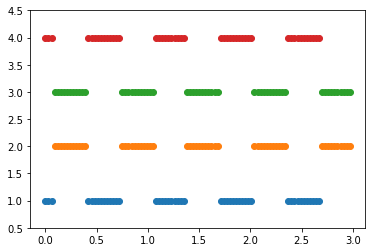

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from blind_walking.envs.sensors import cpg_sensors

cpg_sensor = cpg_sensors.ReferenceGaitSensor(
    gait_name = "trot",
    obs_steps_ahead=[0, 1, 2, 4]
)
cpg_sensor.on_reset(None)

NUM_STEPS = 100

time = np.arange(NUM_STEPS) * 0.03
obs_history = np.zeros((NUM_STEPS, 4 * 4))
foot_contacts = np.zeros((NUM_STEPS, 4))

for i in range(NUM_STEPS):
    cpg_sensor.on_step(None)
    foot_contacts[i] = cpg_sensor.get_current_reference_state()
    obs_history[i] = cpg_sensor._get_observation()
    print(obs_history[i])

plt.figure()
plt.ylim(0.5, 4.5)
for i in range(4):    
    plt.scatter(time[:100], foot_contacts[:100, i] * (i+1))